In [1]:
import sys, os
sys.path.append(os.path.abspath('../src'))
from Database import Database
import pandas as pd

In [11]:
db = Database()
card = db.getCardByTitle('Search for Azcanta')

In [12]:
df = db.getTimeSeriesDataFrame(card)

def max_decks(num):
    if num>16:
        return 16
    else:
        return num
df['deck_nums'] = df['deck_nums'].apply(max_decks)

In [13]:
tix = df[['date', 'tix','price']].drop_duplicates().set_index('date')
occ = df[['date', 'tot_occ', 'deck_nums']].set_index('date').groupby('date').sum()
occ['norm_occ']  = occ['tot_occ']/occ['deck_nums']

In [14]:
time_series = pd.merge(tix, occ, how='left', left_index=True, right_index=True)

In [17]:
sys.path.append('../env/lib/python3.7/sites_pacakges')
import matplotlib.dates as mdates
from scipy import integrate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


def show_raw_and_prices(df):

    
    #plot data
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax = df.plot(y='tix', ax=ax)
    ax = df.plot(y='price', ax=ax)
    ax = df.plot(y='norm_occ', ax=ax, style='--', alpha=1)
    
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.grid()
    plt.gcf().autofmt_xdate()
    plt.show()

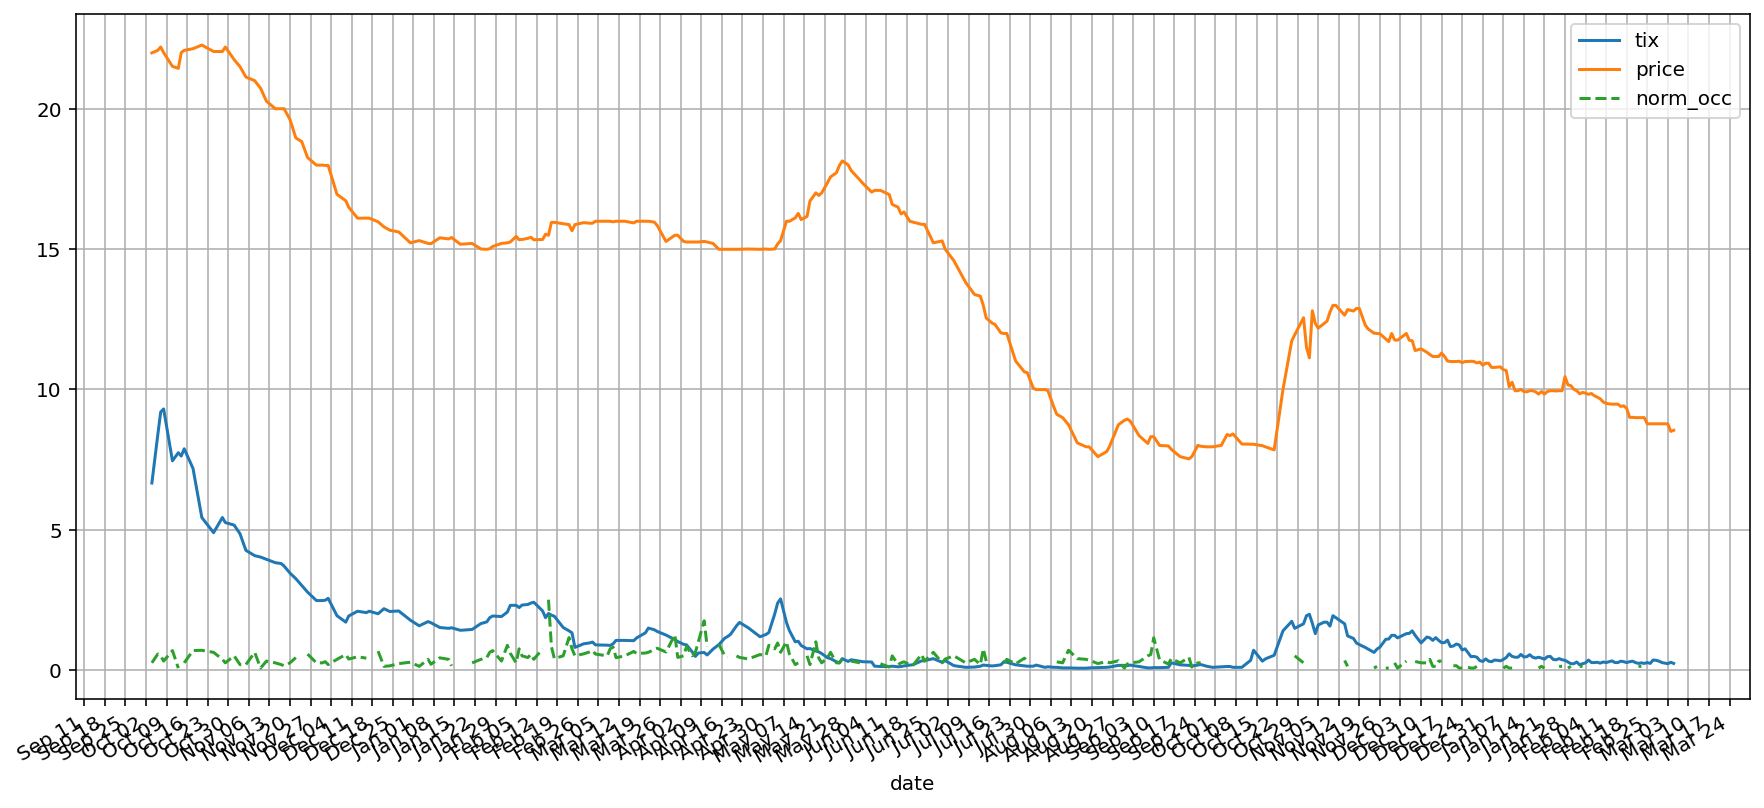

In [18]:
show_raw_and_prices(time_series)

In [19]:
time_series

,tix,price,tot_occ,deck_nums,norm_occ
date,,,,,
2020-03-05,0.23,8.54,1,16,0.062500
2020-03-04,0.27,8.50,0,0,NaN
2020-03-03,0.22,8.77,0,0,NaN
2020-03-02,0.24,8.77,0,0,NaN
2020-03-01,0.26,8.77,2,9,0.222222
...,...,...,...,...,...
2018-10-11,7.45,21.51,11,16,0.687500
2018-10-08,9.30,22.00,5,16,0.312500
2018-10-07,9.19,22.20,8,16,0.500000
